In [1]:
import numpy as np
import torch
import torchvision
import torchmetrics
import lightning.pytorch as pl
from torchinfo import summary
from torchview import draw_graph
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
if (torch.cuda.is_available()):
    device = ("cuda")
else:
    device = ("cpu")
print(torch.cuda.is_available())

False


In [76]:
size = (1,1,6,6)

ones = np.ones(shape=size)

In [77]:
ones

array([[[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]]])

### Starting

In [78]:
# Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self,
                 **kwargs):
        super().__init__(**kwargs)

    def forward(self, x):
        y = x
        return y

    def predict(self, x):
        y = x
        return y

In [79]:
model = NeuralNetwork()

In [80]:
summary(model, input_size=ones.shape)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1, 6, 6]              --
Total params: 0
Trainable params: 0
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

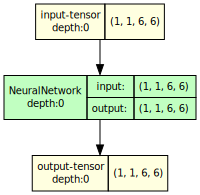

In [81]:
model_graph = draw_graph(model, input_size=ones.shape,
                         device=device, depth=1)
model_graph.visual_graph

### Add a Conv2D layer

In [87]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self,
                 **kwargs):
        super().__init__(**kwargs)
        self.conv1 = torch.nn.Conv2d(1, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv_activation = torch.nn.ReLU()                         

    def forward(self, x):
        y = x
        y = self.conv1(y)
        y = self.conv_activation(y)
        return y

    def predict(self, x):
        y = x
        return y

In [88]:
model = NeuralNetwork()

In [89]:
summary(model, input_size=ones.shape)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 32, 4, 4]             --
├─Conv2d: 1-1                            [1, 32, 4, 4]             320
├─ReLU: 1-2                              [1, 32, 4, 4]             --
Total params: 320
Trainable params: 320
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

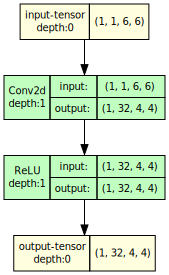

In [90]:
model_graph = draw_graph(model, input_size=ones.shape,
                         device=device, depth=1)
model_graph.visual_graph

### Convolve twice...

In [149]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self,
                 **kwargs):
        super().__init__(**kwargs)
        self.conv1 = torch.nn.Conv2d(1, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv2 = torch.nn.Conv2d(32, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv_activation = torch.nn.ReLU()                         

    def forward(self, x):
        y = x
        y = self.conv1(y)
        y = self.conv_activation(y)
        y = self.conv2(y)
        y = self.conv_activation(y)
        return y

    def predict(self, x):
        y = x
        return y

In [150]:
model = NeuralNetwork()

In [151]:
summary(model, input_size=ones.shape)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 32, 2, 2]             --
├─Conv2d: 1-1                            [1, 32, 4, 4]             320
├─ReLU: 1-2                              [1, 32, 4, 4]             --
├─Conv2d: 1-3                            [1, 32, 2, 2]             9,248
├─ReLU: 1-4                              [1, 32, 2, 2]             --
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.04
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.04
Estimated Total Size (MB): 0.04

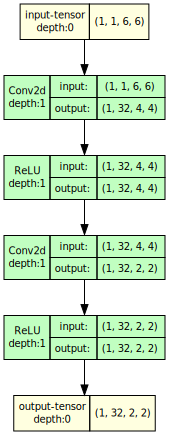

In [152]:
model_graph = draw_graph(model, input_size=ones.shape,
                         device=device, depth=1)
model_graph.visual_graph

### Pooling

In [153]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self,
                 **kwargs):
        super().__init__(**kwargs)
        self.conv1 = torch.nn.Conv2d(1, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv2 = torch.nn.Conv2d(32, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.pool1_2 = torch.nn.MaxPool2d((2,2))
        
        self.conv_activation = torch.nn.ReLU()                         

    def forward(self, x):
        y = x
        y = self.conv1(y)
        y = self.conv_activation(y)
        y = self.conv2(y)
        y = self.conv_activation(y)
        y = self.pool1_2(y)
        return y

    def predict(self, x):
        y = x
        return y

In [154]:
model = NeuralNetwork()

In [155]:
summary(model, input_size=ones.shape)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 32, 1, 1]             --
├─Conv2d: 1-1                            [1, 32, 4, 4]             320
├─ReLU: 1-2                              [1, 32, 4, 4]             --
├─Conv2d: 1-3                            [1, 32, 2, 2]             9,248
├─ReLU: 1-4                              [1, 32, 2, 2]             --
├─MaxPool2d: 1-5                         [1, 32, 1, 1]             --
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.04
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.04
Estimated Total Size (MB): 0.04

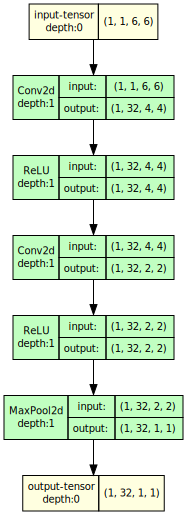

In [156]:
model_graph = draw_graph(model, input_size=ones.shape,
                         device=device, depth=1)
model_graph.visual_graph

### Flattening

In [157]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self,
                 **kwargs):
        super().__init__(**kwargs)
        self.conv1 = torch.nn.Conv2d(1, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv2 = torch.nn.Conv2d(32, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv_activation = torch.nn.ReLU()
        
        self.pool1_2 = torch.nn.MaxPool2d((2,2))
        self.flatten = torch.nn.Flatten()
        self.output_layer = torch.nn.Linear(32,10)
        self.output_activation = torch.nn.Softmax()
        
    def forward(self, x):
        y = x
        y = self.conv1(y)
        y = self.conv_activation(y)
        y = self.conv2(y)
        y = self.conv_activation(y)
        y = self.pool1_2(y)
        y = self.flatten(y)
        # y = y.flatten(start_dim=1)
        y = self.output_layer(y)
        return y

    def predict(self, x):
        y = x
        y = self.output_activation(y)
        return y

In [158]:
model = NeuralNetwork()

In [159]:
summary(model, input_size=ones.shape)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 10]                   --
├─Conv2d: 1-1                            [1, 32, 4, 4]             320
├─ReLU: 1-2                              [1, 32, 4, 4]             --
├─Conv2d: 1-3                            [1, 32, 2, 2]             9,248
├─ReLU: 1-4                              [1, 32, 2, 2]             --
├─MaxPool2d: 1-5                         [1, 32, 1, 1]             --
├─Flatten: 1-6                           [1, 32]                   --
├─Linear: 1-7                            [1, 10]                   330
Total params: 9,898
Trainable params: 9,898
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.04
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.04
Estimated Total Size (MB): 0.04

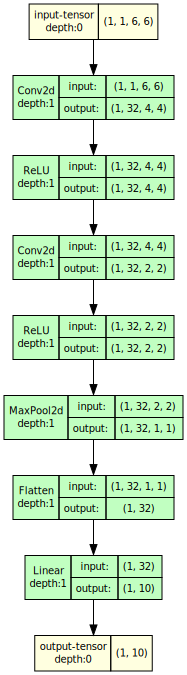

In [160]:
model_graph = draw_graph(model, input_size=ones.shape,
                         device=device, depth=1)
model_graph.visual_graph

### Generative output...

Need to invert this functional form above.

In [161]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self,
                 **kwargs):
        super().__init__(**kwargs)
        self.conv1 = torch.nn.Conv2d(1, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv2 = torch.nn.Conv2d(32, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv_activation = torch.nn.ReLU()
        
        self.pool1_2 = torch.nn.MaxPool2d((2,2))
        self.flatten = torch.nn.Flatten()
        self.latent_layer = torch.nn.Linear(32,32)

        self.unpool1_2 = torch.nn.Upsample((2,2))
        self.conv2_t = torch.nn.ConvTranspose2d(32,
                                                32,
                                                kernel_size=(3,3),
                                                stride=(1,1),
                                                padding=(0,0))
        self.conv1_t = torch.nn.ConvTranspose2d(32,
                                                1,
                                                kernel_size=(3,3),
                                                stride=(1,1),
                                                padding=(0,0))
        self.output_activation = torch.nn.Tanh()
        
    def forward(self, x):
        y = x
        y = self.conv1(y)
        y = self.conv_activation(y)
        y = self.conv2(y)
        y = self.conv_activation(y)
        y = self.pool1_2(y)
        y = self.flatten(y)
        # y = y.flatten(start_dim=1)

        # Latent (low-dimensional) representation
        y = torch.tanh(self.latent_layer(y))

        y = torch.reshape(y,(-1,32,1,1))
        y = self.unpool1_2(y)

        y = self.conv2_t(y)
        y = self.conv_activation(y)

        y = self.conv1_t(y)
        y = self.conv_activation(y)
        
        return y

    def predict(self, x):
        y = x
        y = self.output_activation(y)
        return y

In [162]:
model = NeuralNetwork()

In [163]:
summary(model, input_size=ones.shape)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1, 6, 6]              --
├─Conv2d: 1-1                            [1, 32, 4, 4]             320
├─ReLU: 1-2                              [1, 32, 4, 4]             --
├─Conv2d: 1-3                            [1, 32, 2, 2]             9,248
├─ReLU: 1-4                              [1, 32, 2, 2]             --
├─MaxPool2d: 1-5                         [1, 32, 1, 1]             --
├─Flatten: 1-6                           [1, 32]                   --
├─Linear: 1-7                            [1, 32]                   1,056
├─Upsample: 1-8                          [1, 32, 2, 2]             --
├─ConvTranspose2d: 1-9                   [1, 32, 4, 4]             9,248
├─ReLU: 1-10                             [1, 32, 4, 4]             --
├─ConvTranspose2d: 1-11                  [1, 1, 6, 6]              289
├─ReLU: 1-12                             [1, 1, 6, 6]              --
Tota

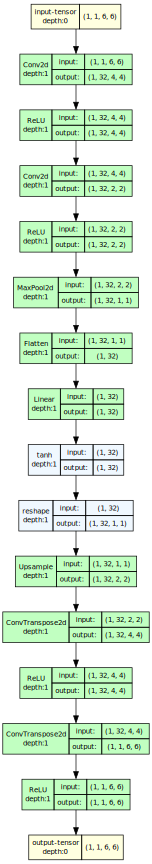

In [164]:
model_graph = draw_graph(model, input_size=ones.shape,
                         device=device, depth=1)
model_graph.visual_graph

### Generative CIFAR10 Example

In [166]:
size = (1,3,32,32)

ones = np.ones(shape=size)

In [371]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self,
                 **kwargs):
        super().__init__(**kwargs)
        self.conv1 = torch.nn.Conv2d(3, # Input channels
                                     32, # Output channels
                                     kernel_size=(6,6), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv2 = torch.nn.Conv2d(32, # Input channels
                                     32, # Output channels
                                     kernel_size=(6,6), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv3 = torch.nn.Conv2d(32, # Input channels
                                     32, # Output channels
                                     kernel_size=(4,4), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv4 = torch.nn.Conv2d(32, # Input channels
                                     32, # Output channels
                                     kernel_size=(3,3), # Kernel window
                                     stride=(1,1), # Step size
                                     padding=(0,0))
        self.conv_activation = torch.nn.ReLU()
        
        self.pool1_2 = torch.nn.MaxPool2d((2,2))
        self.pool3_4 = torch.nn.MaxPool2d((2,2))
        
        self.flatten = torch.nn.Flatten()
        self.latent_layer = torch.nn.Linear(32*3*3,32)

        self.projection_layer = torch.nn.Linear(32,32*3*3)
        
        self.unpool3_4 = torch.nn.Upsample((8,8))
        self.conv4_t = torch.nn.ConvTranspose2d(32,
                                                32,
                                                kernel_size=(3,3),
                                                stride=(1,1),
                                                padding=(0,0))
        self.conv3_t = torch.nn.ConvTranspose2d(32,
                                                32,
                                                kernel_size=(4,4),
                                                stride=(1,1),
                                                padding=(0,0))

        
        self.unpool1_2 = torch.nn.Upsample((24,24))
        self.conv2_t = torch.nn.ConvTranspose2d(32,
                                                32,
                                                kernel_size=(6,6),
                                                stride=(1,1),
                                                padding=(0,0))
        self.conv1_t = torch.nn.ConvTranspose2d(32,
                                                3,
                                                kernel_size=(6,6),
                                                stride=(1,1),
                                                padding=(1,1))
        self.output_activation = torch.nn.Tanh()
        
    def forward(self, x):
        y = x
        y = self.conv1(y)
        y = self.conv_activation(y)
        y = self.conv2(y)
        y = self.conv_activation(y)
        y = self.pool1_2(y)
        y = self.conv3(y)
        y = self.conv_activation(y)
        y = self.conv4(y)
        y = self.conv_activation(y)
        y = self.pool3_4(y)
        y = self.flatten(y)
        # y = y.flatten(start_dim=1)

        # Latent (low-dimensional) representation
        y = torch.tanh(self.latent_layer(y))

        y = self.projection_layer (y)
        y = torch.reshape(y,(-1,32,3,3))

        y = self.unpool3_4(y)
        y = self.conv4_t(y)
        y = self.conv_activation(y)
        y = self.conv3_t(y)
        y = self.conv_activation(y)
        
        y = self.unpool1_2(y)

        y = self.conv2_t(y)
        y = self.conv_activation(y)

        y = self.conv1_t(y)
        y = self.conv_activation(y)
        
        return y

    def predict(self, x):
        y = x
        y = self.output_activation(y)
        return y

In [372]:
model = NeuralNetwork()

In [373]:
summary(model, input_size=ones.shape)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 3, 32, 32]            --
├─Conv2d: 1-1                            [1, 32, 27, 27]           3,488
├─ReLU: 1-2                              [1, 32, 27, 27]           --
├─Conv2d: 1-3                            [1, 32, 22, 22]           36,896
├─ReLU: 1-4                              [1, 32, 22, 22]           --
├─MaxPool2d: 1-5                         [1, 32, 11, 11]           --
├─Conv2d: 1-6                            [1, 32, 8, 8]             16,416
├─ReLU: 1-7                              [1, 32, 8, 8]             --
├─Conv2d: 1-8                            [1, 32, 6, 6]             9,248
├─ReLU: 1-9                              [1, 32, 6, 6]             --
├─MaxPool2d: 1-10                        [1, 32, 3, 3]             --
├─Flatten: 1-11                          [1, 288]                  --
├─Linear: 1-12                           [1, 32]                   9,24

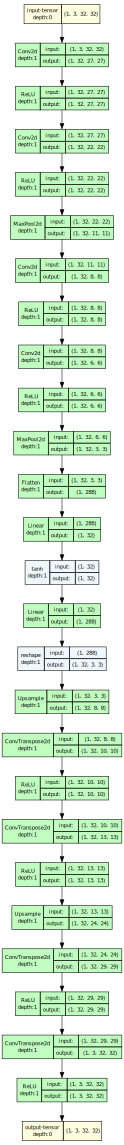

In [374]:
model_graph = draw_graph(model, input_size=ones.shape,
                         device=device, depth=1)
model_graph.visual_graph